In [1]:
import torch

In [6]:
torch.empty(2, 3)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 7.7447e+31]])

In [7]:
torch.rand(2, 2)

tensor([[0.8405, 0.7343],
        [0.3506, 0.6634]])

In [8]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)

x + y

tensor([[0.5353, 1.0056],
        [0.3308, 0.8441]])

In [9]:
y.add_(x) # Inplace addition

tensor([[0.5353, 1.0056],
        [0.3308, 0.8441]])

In [11]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [12]:
b = a.numpy()
type(b)

numpy.ndarray

In [13]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [15]:
b # Will also get updated since they point to the same memory location

array([2., 2., 2., 2., 2.], dtype=float32)

In [2]:
torch.cuda.is_available()

True

In [5]:
torch.__version__

'1.9.0'

In [6]:
x = torch.ones(5, requires_grad=True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [7]:
y = x + 2
y

tensor([3., 3., 3., 3., 3.], grad_fn=<AddBackward0>)

In [8]:
z = y * y * 2
z

tensor([18., 18., 18., 18., 18.], grad_fn=<MulBackward0>)

In [9]:
z = z.mean()
z

tensor(18., grad_fn=<MeanBackward0>)

In [10]:
z.backward() # dz/dx

In [11]:
x.grad

tensor([2.4000, 2.4000, 2.4000, 2.4000, 2.4000])

In [12]:
z = y*y + 5

In [13]:
z

tensor([14., 14., 14., 14., 14.], grad_fn=<AddBackward0>)

In [14]:
torch.zeros(1).cuda()

tensor([0.], device='cuda:0')

In [15]:
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [16]:
y = x.detach()
y

tensor([1., 1., 1., 1., 1.])

In [20]:
z = y*y*2
z

tensor([2., 2., 2., 2., 2.])

In [21]:
z.backward

<bound method Tensor.backward of tensor([2., 2., 2., 2., 2.])>

In [25]:
### We should always set the gradient to zero in the training loop otherwise the gradients get added

weights = torch.ones(4, requires_grad=True)

optimizer = torch.optim.SGD([weights], lr=0.01)

optimizer.step()

optimizer.zero_grad()

for epoch in range(3):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [24]:
weights

tensor([1., 1., 1., 1.], requires_grad=True)

In [26]:
## Backpropagation

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

y_hat = w * x
loss = (y_hat - y)**2

loss

tensor(1., grad_fn=<PowBackward0>)

In [27]:
loss.backward()
w.grad

tensor(-2.)

In [31]:
import numpy as np

# Create a data set that follows the function y = 2*x
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)^2
# dJ/dw = 1/N 2x(w*x-y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y)

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    dw = gradient(X,Y,y_pred)
    
    w -= learning_rate*dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [33]:
# Create a data set that follows the function y = 2*x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_predicted):
    return ((y_predicted-y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    # Update weights with no grad operation so that it doesn't get added to the computation graph
    with torch.no_grad():
        w -= learning_rate*w.grad
        
    # Zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        

print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [37]:
# 1) Design model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#  - forward pass: compute prediction
#  - backward pass: gradients
#  - update weights

import torch
import torch.nn as nn

# Create a data set that follows the function y = 2*x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    y_pred = model(X)
    
    l = loss(Y, y_pred)
    
    l.backward()
    
    # Update weights with optimizer
    optimizer.step()
        
    # Zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')


4 1
Prediction before training: f(5) = -3.027
epoch 1: w = -0.336, loss = 48.12294769
epoch 11: w = 1.261, loss = 1.51293135
epoch 21: w = 1.529, loss = 0.29142705
epoch 31: w = 1.582, loss = 0.24513958
epoch 41: w = 1.601, loss = 0.23011249
epoch 51: w = 1.614, loss = 0.21669905
epoch 61: w = 1.625, loss = 0.20408542
epoch 71: w = 1.636, loss = 0.19220662
epoch 81: w = 1.647, loss = 0.18101916
epoch 91: w = 1.657, loss = 0.17048302
Prediction after training: f(5) = 9.313


In [38]:
# Defining custom networks
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        return self.lin(x)


epoch: 10, loss = 48165.9531
epoch: 20, loss = 46290.0781
epoch: 30, loss = 44927.7500
epoch: 40, loss = 43937.7852
epoch: 50, loss = 43218.0195
epoch: 60, loss = 42694.4531
epoch: 70, loss = 42313.4414
epoch: 80, loss = 42036.0547
epoch: 90, loss = 41834.0391
epoch: 100, loss = 41686.8672


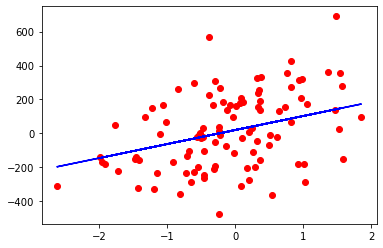

In [46]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=230, random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Need to reshape y to have 1 column and n rows
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y, y_pred)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
        
# plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


In [44]:
y.shape

torch.Size([100, 1])